<a href="https://colab.research.google.com/github/HwangJae-won/Data_project_practice/blob/main/0928_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0928 Heart Disease Prediction
[피드백]
- 실제 시험에서는 코랩 환경에서 진행하자. 노트북 로컬에서 진행하니 커널 다운이 계속 됐다
- SVM, Ridge, Lasso 등 단순 모델도 성능 확인해볼걸 그랬다
- 모델링 시에 쓰는 파라미터 종류들 좀 더 공부해둘 것
-
---


## 데이터 전처리

In [1]:
#전처리
import pandas as pd
import numpy as np
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishidamarla/heart-disease-prediction")

print("Path to dataset files:", path) 

Path to dataset files: /home/cine/.cache/kagglehub/datasets/rishidamarla/heart-disease-prediction/versions/1


In [3]:
df = pd.read_csv("/home/cine/.cache/kagglehub/datasets/rishidamarla/heart-disease-prediction/versions/1/Heart_Disease_Prediction.csv")

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


target 변수 0,1로 변환해주기

In [5]:
df= df.replace({'Heart Disease': {'Presence': 1, 'Absence': 0}})

In [6]:
df.info()
#결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

target 변수의 비율 확인

In [7]:
df['Heart Disease'].value_counts()/len(df)
#불균형은 보이지 않음

0    0.555556
1    0.444444
Name: Heart Disease, dtype: float64

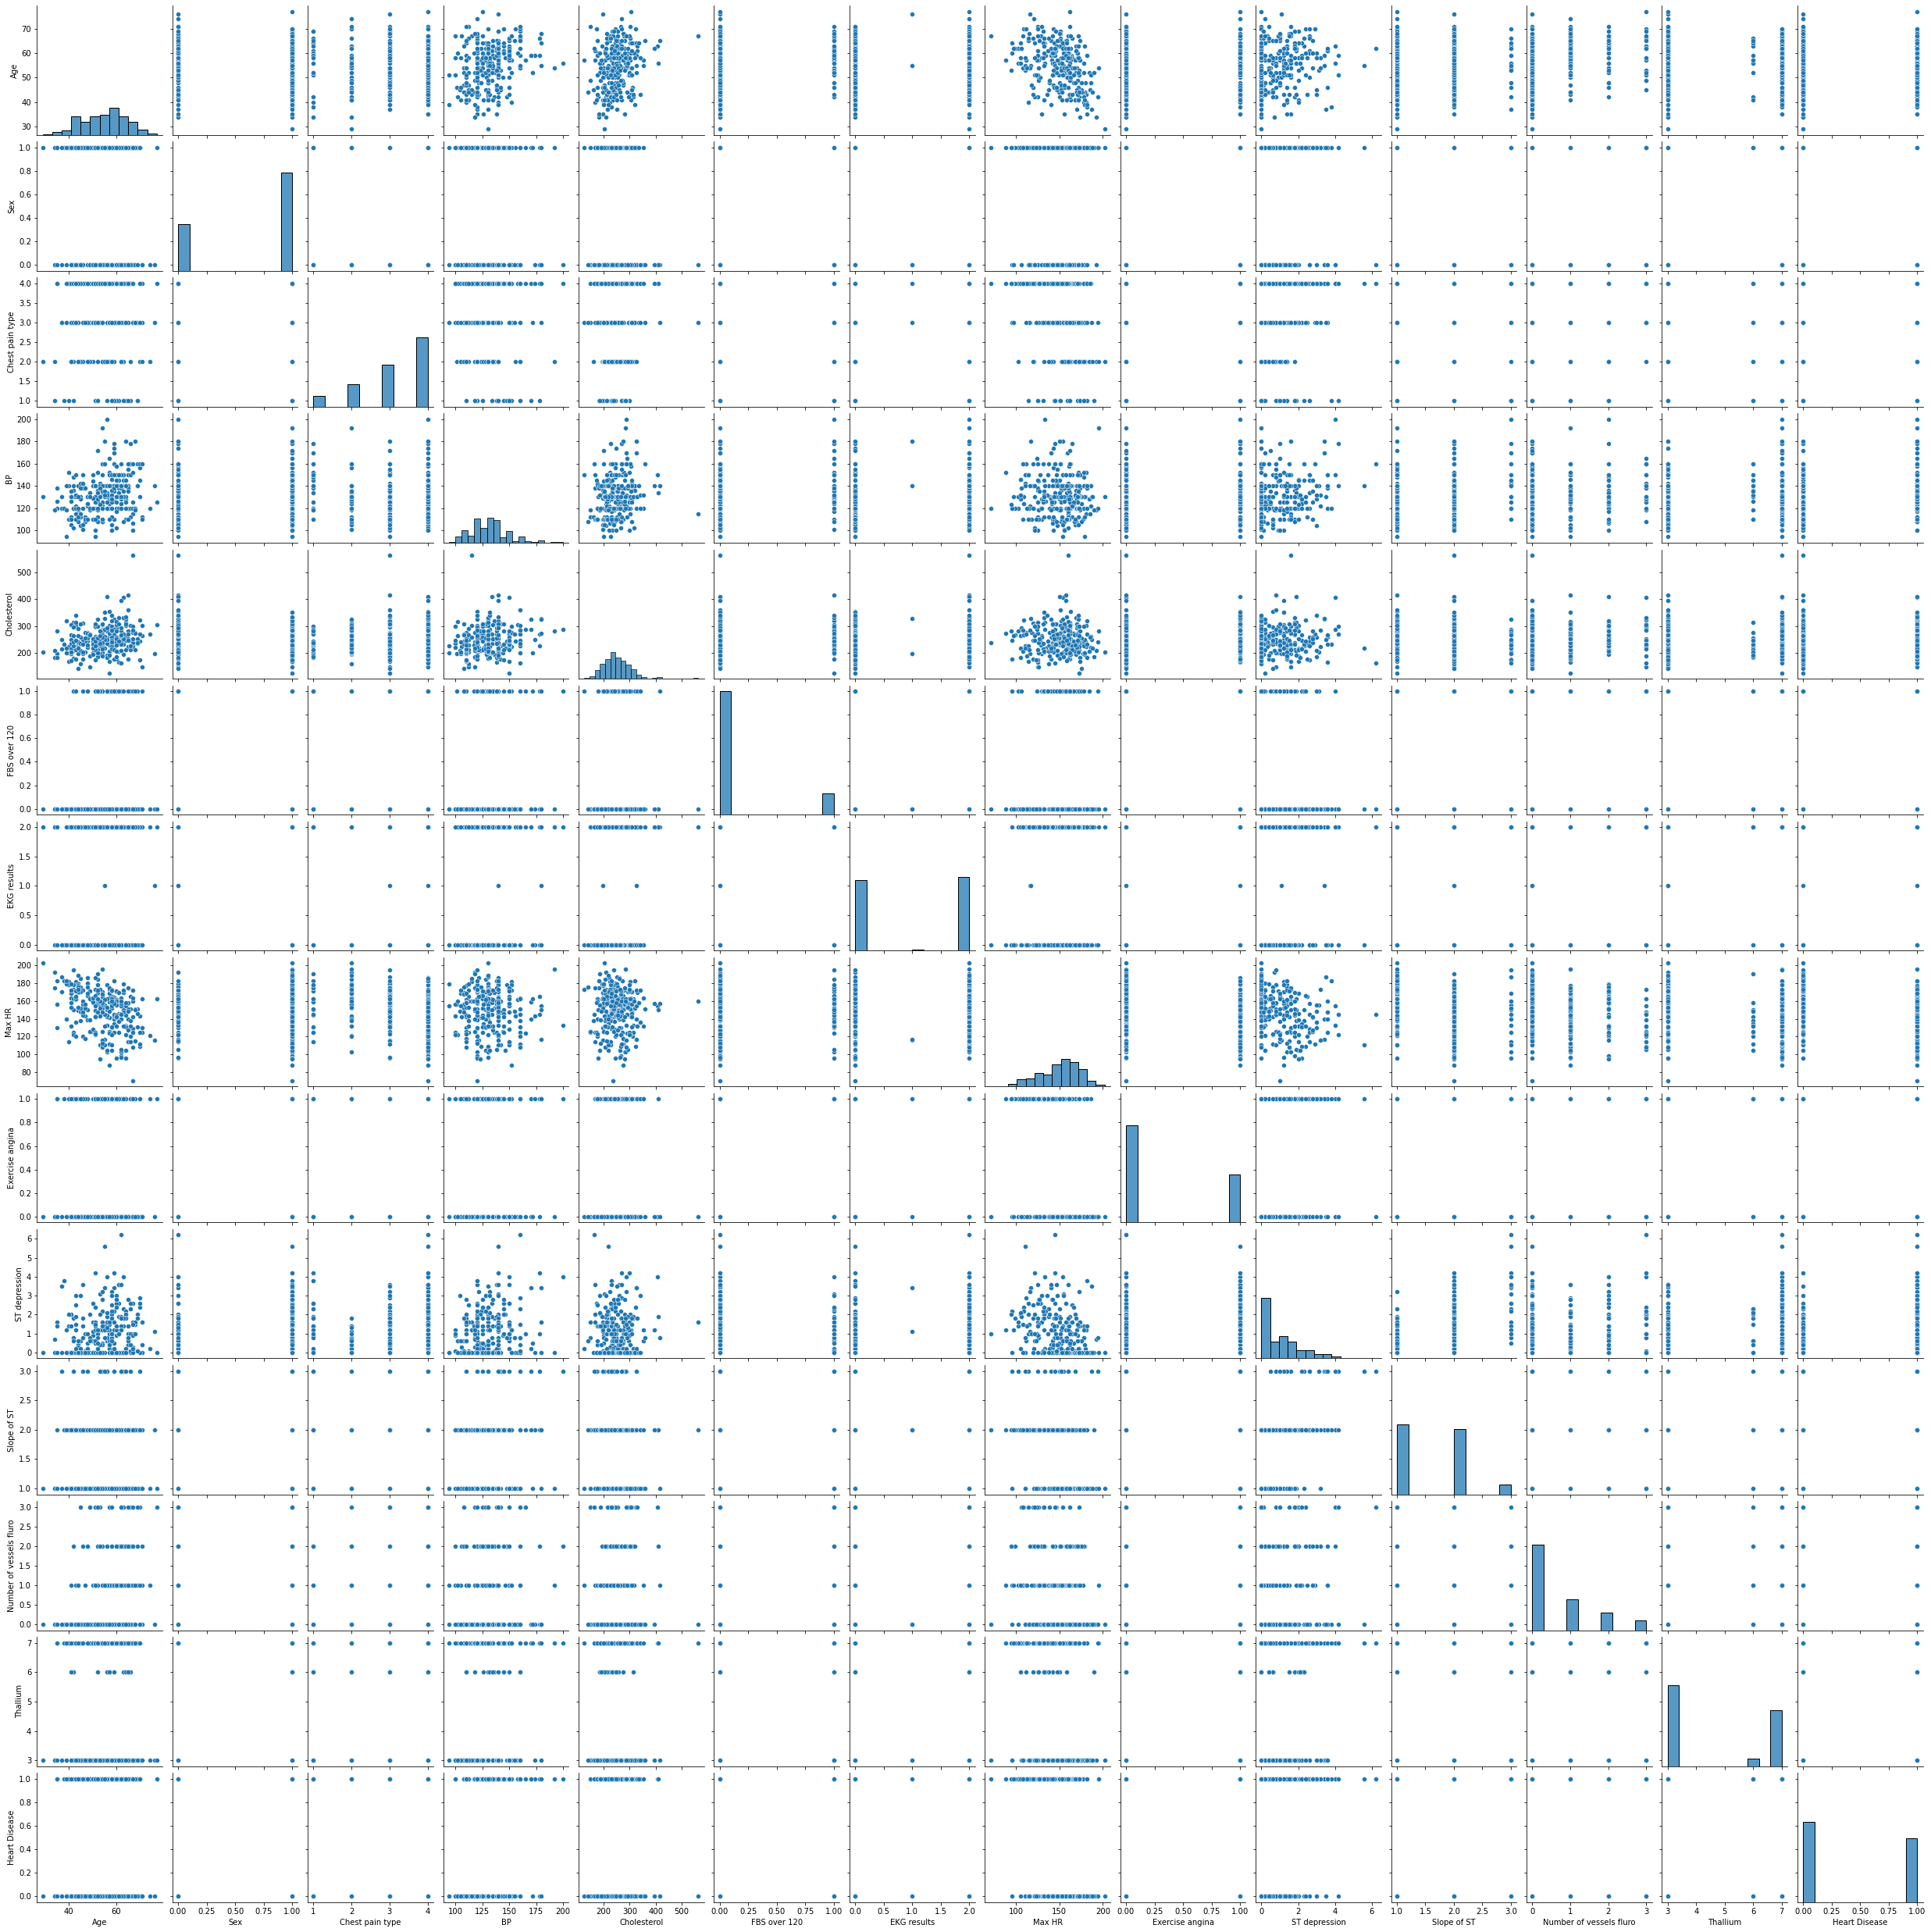

In [8]:
sns.pairplot(df)
#모든 변수에 대한 pairplot: 시간 너무 오래걸림 얘는 빼자

In [9]:
X= df.drop(["Heart Disease"],axis=1)
y= df[["Heart Disease"]]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# 정규화, 인코딩
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 27.5 KB


## 수치형과 범주형 변수 나누어 인코딩, 스케일링 진행

In [12]:
numerical_ix = X.columns[[0, 3, 4, 5] ]
categorical_ix = X.columns[[1, 2, 5, 6, 8,10,11,12 ]]

In [13]:
t = [('cat', OneHotEncoder(handle_unknown = "ignore"), categorical_ix), ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

In [14]:
X_train_std = col_transform.fit_transform(X_train)
X_test_std = col_transform.transform(X_test)

In [15]:
X_train_std

array([[ 0.        ,  1.        ,  1.        , ..., -0.67478847,
        -1.05780979, -0.41763453],
       [ 1.        ,  0.        ,  0.        , ...,  1.67028286,
        -0.90567196, -0.41763453],
       [ 0.        ,  1.        ,  0.        , ..., -1.84732413,
        -0.50631017, -0.41763453],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  4.01535418,
         0.7488269 ,  2.394438  ],
       [ 0.        ,  1.        ,  0.        , ..., -1.2610563 ,
        -0.98174087, -0.41763453],
       [ 0.        ,  1.        ,  0.        , ..., -1.84732413,
         0.95801641, -0.41763453]])

## Modlening and Tuning

In [16]:
#classifier 설정
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [17]:
#튜닝 방법:grid
from sklearn.model_selection import GridSearchCV

In [18]:
#model 정의
models = {
    'RandomForest': (RandomForestClassifier(),
                 {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),
    'LightGBM': (LGBMClassifier(),
                {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_child_samples':[5, 100],
                }),
    #LGBM 계속 커널 오류
    'GB': (GradientBoostingClassifier(),
                 {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),
    'ExtraTree': (ExtraTreesClassifier(),
                  {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),

    'Catboost': (CatBoostClassifier(),
                 {
                    'depth': [4, 5, 6],
                    'leaf_estimation_iterations': [10]
                 }),
    # 'SVR': (SVR(), {
    #     'C': (0.1, 10.0, 'log-uniform'),
    #     'epsilon': (0.01, 0.1, 'uniform')
    # }),
    # 'Lasso': (Lasso(), {
    #     'alpha': (0.01, 1.0, 'log-uniform')
    # }),
    # 'Ridge': (Ridge(), {
    #     'alpha': (0.01, 1.0, 'log-uniform')
    # }),
}

In [19]:
models.items()

dict_items([('RandomForest', (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [2, 20], 'min_samples_split': [5, 100]})), ('LightGBM', (LGBMClassifier(), {'n_estimators': [50, 100], 'max_depth': [2, 20], 'min_child_samples': [5, 100]})), ('GB', (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'max_depth': [2, 20], 'min_samples_split': [5, 100]})), ('ExtraTree', (ExtraTreesClassifier(), {'n_estimators': [50, 100], 'max_depth': [2, 20], 'min_samples_split': [5, 100]})), ('Catboost', (<catboost.core.CatBoostClassifier object at 0x7fe79b55ff70>, {'depth': [4, 5, 6], 'leaf_estimation_iterations': [10]}))])

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [21]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
model_results2 = []

# 모델별로 튜닝 및 적합
for model_name, (model, param_grid) in models.items():
    print(f"Start {model_name} Training!")
    search = GridSearchCV(model, param_grid, scoring='accuracy',  n_jobs=-1)
    search.fit(X_train_std, y_train)

    # 최적의 모델과 하이퍼파라미터 출력
    best_model =search.best_estimator_
    best_params =search.best_params_
    print(f"Best Parameters: {best_params}")

    # 테스트 데이터에 대한 예측 및 평가
    y_pred = best_model.predict(X_test_std)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    c_m = confusion_matrix(y_test, y_pred)
    print(f"F1 score: {f1}\n")
    print(f"Accuracy: {accuracy}\n")
    print(f"Confusion Matrix: {c_m}\n")


    # 모델 이름과 accuracy 결과 저장
    model_results2.append((model_name, accuracy, f1))

Start RandomForest Training!


/usr/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 100}
F1 score: 0.7857142857142857

Accuracy: 0.8235294117647058

Confusion Matrix: [[34  6]
 [ 6 22]]

Start LightGBM Training!
[LightGBM] [Info] Number of positive: 92, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 202, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455446 -> initscore=-0.178692
[LightGBM] [Info] Start training from score -0.178692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/usr/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Parameters: {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 50}
F1 score: 0.7999999999999999

Accuracy: 0.8235294117647058

Confusion Matrix: [[32  8]
 [ 4 24]]

Start ExtraTree Training!


/usr/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 50}
F1 score: 0.75

Accuracy: 0.7941176470588235

Confusion Matrix: [[33  7]
 [ 7 21]]

Start Catboost Training!
0:	learn: 0.6672554	total: 50.5ms	remaining: 50.5s
1:	learn: 0.6449018	total: 53.6ms	remaining: 26.7s
2:	learn: 0.6250323	total: 55.9ms	remaining: 18.6s
3:	learn: 0.6065856	total: 58.4ms	remaining: 14.6s
4:	learn: 0.5872743	total: 60.7ms	remaining: 12.1s
5:	learn: 0.5699934	total: 62.5ms	remaining: 10.4s
6:	learn: 0.5552052	total: 64.3ms	remaining: 9.13s
7:	learn: 0.5399596	total: 65.9ms	remaining: 8.17s
8:	learn: 0.5250059	total: 67.7ms	remaining: 7.45s
9:	learn: 0.5141189	total: 69.2ms	remaining: 6.85s
10:	learn: 0.5040063	total: 70.3ms	remaining: 6.32s
11:	learn: 0.4944745	total: 71.7ms	remaining: 5.9s
12:	learn: 0.4820812	total: 73.3ms	remaining: 5.56s
13:	learn: 0.4723321	total: 74.4ms	remaining: 5.24s
14:	learn: 0.4623104	total: 75.7ms	remaining: 4.97s
15:	learn: 0.4531634	total: 77ms	remaining

In [23]:
model_results2

[('RandomForest', 0.8235294117647058, 0.7857142857142857),
 ('LightGBM', 0.7794117647058824, 0.7540983606557378),
 ('GB', 0.8235294117647058, 0.7999999999999999),
 ('ExtraTree', 0.7941176470588235, 0.75),
 ('Catboost', 0.7647058823529411, 0.7142857142857143)]

In [24]:
model_results2

[('RandomForest', 0.8235294117647058, 0.7857142857142857),
 ('LightGBM', 0.7794117647058824, 0.7540983606557378),
 ('GB', 0.8235294117647058, 0.7999999999999999),
 ('ExtraTree', 0.7941176470588235, 0.75),
 ('Catboost', 0.7647058823529411, 0.7142857142857143)]

GB, ExtraTree, RF가 높음

In [25]:
models

{'RandomForest': (RandomForestClassifier(),
  {'n_estimators': [50, 100],
   'max_depth': [2, 20],
   'min_samples_split': [5, 100]}),
 'LightGBM': (LGBMClassifier(),
  {'n_estimators': [50, 100],
   'max_depth': [2, 20],
   'min_child_samples': [5, 100]}),
 'GB': (GradientBoostingClassifier(),
  {'n_estimators': [50, 100],
   'max_depth': [2, 20],
   'min_samples_split': [5, 100]}),
 'ExtraTree': (ExtraTreesClassifier(),
  {'n_estimators': [50, 100],
   'max_depth': [2, 20],
   'min_samples_split': [5, 100]}),
 'Catboost': (<catboost.core.CatBoostClassifier at 0x7fe79b55ff70>,
  {'depth': [4, 5, 6], 'leaf_estimation_iterations': [10]})}

In [26]:
models

{'RandomForest': (RandomForestClassifier(),
  {'n_estimators': [50, 100],
   'max_depth': [2, 20],
   'min_samples_split': [5, 100]}),
 'LightGBM': (LGBMClassifier(),
  {'n_estimators': [50, 100],
   'max_depth': [2, 20],
   'min_child_samples': [5, 100]}),
 'GB': (GradientBoostingClassifier(),
  {'n_estimators': [50, 100],
   'max_depth': [2, 20],
   'min_samples_split': [5, 100]}),
 'ExtraTree': (ExtraTreesClassifier(),
  {'n_estimators': [50, 100],
   'max_depth': [2, 20],
   'min_samples_split': [5, 100]}),
 'Catboost': (<catboost.core.CatBoostClassifier at 0x7fe79b55ff70>,
  {'depth': [4, 5, 6], 'leaf_estimation_iterations': [10]})}

In [27]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier
vc = VotingClassifier(models, voting='soft')
voting_classifier = VotingClassifier(estimators=models)

In [28]:
# y_train = y_train.ravel()
# voting_classifier.fit(X_train_std, y_train)
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# 각 분류기 정의
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)

# 추정기 목록 정의
estimators = [
    ('lr', clf1),
    ('dt', clf2),
    ('svc', clf3)
]

# VotingClassifier 정의 (하드 보팅)
voting_classifier = VotingClassifier(estimators=estimators, voting='hard')

# 모델 학습
voting_classifier.fit(X_train_std, y_train)

/usr/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))])

In [29]:
y_pred = voting_classifier.predict(X_test_std)
f1 = f1_score(y_test, y_pred)
c_m = confusion_matrix(y_test, y_pred)
print(f"F1 score: {f1}\n")
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: {c_m}\n")

F1 score: 0.7017543859649122

Accuracy: 0.7647058823529411

Confusion Matrix: [[31  9]
 [ 8 20]]



In [30]:
# hard VotingClassifier
vc = VotingClassifier(models, voting='hard')
voting_classifier = VotingClassifier(estimators=estimators)
voting_classifier.fit(X_train_std, y_train)
y_pred = voting_classifier.predict(X_test_std)
f1 = f1_score(y_test, y_pred)
c_m = confusion_matrix(y_test, y_pred)
print(f"F1 score: {f1}\n")
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: {c_m}\n")

F1 score: 0.736842105263158

Accuracy: 0.7647058823529411

Confusion Matrix: [[32  8]
 [ 7 21]]



/usr/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### accuracy
- RandomForest, 0.7941176470588235
- GB, **0.823529**4117647058
- Catboost, 0.7647058823529411
- ExtraTree', 0.7941176470588235
- sofr voting: 0.764

----
**GB 단독이 성능 더 높음:  0.8235**
